In [1]:
import pandas as pd
import numpy as np

In [2]:
cases_df = pd.read_csv("C:/Users/owenb/aggregated_cc_by.csv")
trends_df = pd.read_csv("C:/Users/owenb/2020_US_weekly_symptoms_dataset.csv")

C:\Users\owenb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
trends_df.head()

,open_covid_region_code,country_region_code,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,date,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.28,NaN,NaN
1,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.26,NaN,NaN
2,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.48,NaN,NaN
3,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.93,NaN,NaN
4,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-02-03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.93,NaN,NaN


In [4]:
# Getting all us states
us_states = trends_df.open_covid_region_code.unique()
print(us_states)

['US-AK' 'US-DC' 'US-DE' 'US-HI' 'US-ID' 'US-ME' 'US-MT' 'US-ND' 'US-NE'
 'US-NH' 'US-NM' 'US-RI' 'US-SD' 'US-VT' 'US-WV' 'US-WY']


In [5]:
us_cases = cases_df[cases_df['open_covid_region_code'].isin(us_states)]
us_cases = us_cases.reset_index(drop = True)
us_cases = us_cases[['open_covid_region_code', 'region_name', 'date', 'hospitalized_new']]
print(us_cases[:100])

   open_covid_region_code region_name       date  hospitalized_new
0                   US-WY     Wyoming   3/7/2020               0.0
1                   US-WY     Wyoming   3/8/2020               0.0
2                   US-WY     Wyoming   3/9/2020               0.0
3                   US-WY     Wyoming  3/10/2020               0.0
4                   US-WY     Wyoming  3/11/2020               0.0
..                    ...         ...        ...               ...
95                  US-WY     Wyoming  6/10/2020               1.0
96                  US-WY     Wyoming  6/11/2020               0.0
97                  US-WY     Wyoming  6/12/2020               0.0
98                  US-WY     Wyoming  6/13/2020               1.0
99                  US-WY     Wyoming  6/14/2020               0.0

[100 rows x 4 columns]


In [6]:
def clean_data(df):
    (rows, cols) = df.shape
    print(rows, cols)
    df = df.dropna(axis = 0, how = 'all')
    df = df.dropna(axis = 1, how = 'all')
    df = df.reset_index(drop = True)
    (rows, cols) = df.shape
    print(rows, cols)
    return df

In [7]:
us_cases.columns

Index(['open_covid_region_code', 'region_name', 'date', 'hospitalized_new'], dtype='object')

In [8]:
def group_data_by_weeks(df):
    df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
    df = df.groupby(['open_covid_region_code', pd.Grouper(key='date', freq='W-MON')])['hospitalized_new'].sum().reset_index().sort_values(['open_covid_region_code','date'])
    return df

us_cases = group_data_by_weeks(us_cases)

In [9]:
print("Before cleaning:")
print(trends_df.shape)

trends_df = clean_data(trends_df)

print("After cleaning:")
print(trends_df.shape)

Before cleaning:
(608, 430)
608 430
608 127
After cleaning:
(608, 127)


In [10]:
trends_df['date'] = pd.to_datetime(trends_df['date'])
complete_df = trends_df.merge(us_cases, how='inner', on=['open_covid_region_code', 'date'])
#complete_df.head()

In [11]:
complete_df.to_csv('C:/Users/owenb/test22.csv') 

In [12]:
complete_df.groupby(['open_covid_region_code']).mean()

,symptom:Adrenal crisis,symptom:Ageusia,symptom:Allergic conjunctivitis,symptom:Amblyopia,symptom:Amenorrhea,symptom:Angular cheilitis,symptom:Anosmia,symptom:Aphonia,symptom:Ascites,symptom:Asphyxia,...,symptom:Thyroid nodule,symptom:Trichoptilosis,symptom:Upper respiratory tract infection,symptom:Urethritis,symptom:Urinary urgency,symptom:Vasculitis,symptom:Ventricular fibrillation,symptom:Viral pneumonia,symptom:Yawn,hospitalized_new
open_covid_region_code,,,,,,,,,,,,,,,,,,,,,
US-AK,10.217000,9.810000,10.363571,NaN,10.574286,7.901000,12.046400,7.504000,NaN,14.766000,...,12.488667,11.112069,15.254286,11.536667,7.239167,11.039655,8.325217,12.880000,13.630333,0.000000
US-DC,NaN,7.577667,4.327333,NaN,NaN,4.971333,NaN,2.986364,NaN,NaN,...,NaN,NaN,NaN,NaN,3.345862,NaN,4.186000,5.617143,NaN,0.000000
US-DE,10.076000,11.830345,7.071667,NaN,NaN,6.721333,15.209333,5.367500,NaN,NaN,...,NaN,NaN,NaN,NaN,6.640667,NaN,7.066000,6.892857,NaN,0.000000
US-HI,NaN,NaN,NaN,NaN,NaN,33.708333,NaN,25.504643,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.532381,NaN,27.200000
US-ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.076207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.474333,NaN,60.466667
US-ME,NaN,NaN,16.444333,NaN,NaN,16.938333,NaN,12.555333,NaN,NaN,...,NaN,NaN,NaN,NaN,16.910667,NaN,17.096000,16.991250,NaN,14.866667
US-MT,14.736333,12.901034,8.617586,NaN,13.824333,7.746071,17.120333,7.601000,NaN,17.513667,...,NaN,12.184667,NaN,NaN,8.818966,NaN,8.704828,12.772353,NaN,23.266667
US-ND,9.105333,9.685769,6.446250,NaN,10.001667,4.996000,11.636786,5.128750,NaN,13.489333,...,9.600000,7.862667,12.110000,9.089667,6.025714,NaN,5.965862,9.434615,NaN,27.600000
US-NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.172667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.000000


In [13]:
avgdf = complete_df.groupby(['open_covid_region_code']).mean()

In [14]:
print(avgdf)

                        symptom:Adrenal crisis  symptom:Ageusia  \
open_covid_region_code                                            
US-AK                                10.217000         9.810000   
US-DC                                      NaN         7.577667   
US-DE                                10.076000        11.830345   
US-HI                                      NaN              NaN   
US-ID                                      NaN              NaN   
US-ME                                      NaN              NaN   
US-MT                                14.736333        12.901034   
US-ND                                 9.105333         9.685769   
US-NE                                      NaN              NaN   
US-NH                                      NaN              NaN   
US-NM                                      NaN              NaN   
US-RI                                      NaN              NaN   
US-SD                                11.126000        13.59413

In [16]:
#tdf = avgdf.set_index('open_covid_region_code')
tdf = pd.DataFrame(avgdf.columns.values[np.argsort(-avgdf.values, axis=1)[:, :4]], index=avgdf.index, columns = ['1st Max','2nd Max','3rd Max', '4th Max']).reset_index()


In [17]:
print(tdf)

   open_covid_region_code                           1st Max  \
0                   US-AK                   symptom:Chancre   
1                   US-DC                   symptom:Ageusia   
2                   US-DE           symptom:Photodermatitis   
3                   US-HI         symptom:Shallow breathing   
4                   US-ID                  hospitalized_new   
5                   US-ME              symptom:Dysautonomia   
6                   US-MT                  hospitalized_new   
7                   US-ND                  hospitalized_new   
8                   US-NE                  hospitalized_new   
9                   US-NH                  hospitalized_new   
10                  US-NM                  hospitalized_new   
11                  US-RI                  hospitalized_new   
12                  US-SD                  hospitalized_new   
13                  US-VT           symptom:Photodermatitis   
14                  US-WV           symptom:Pulmonary e

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
filter_col = [col for col in complete_df if col.startswith('symptom:') or col.startswith('date') or col.startswith('open_covid_region_code')]
print(filter_col)

['open_covid_region_code', 'date', 'symptom:Adrenal crisis', 'symptom:Ageusia', 'symptom:Allergic conjunctivitis', 'symptom:Amblyopia', 'symptom:Amenorrhea', 'symptom:Angular cheilitis', 'symptom:Anosmia', 'symptom:Aphonia', 'symptom:Ascites', 'symptom:Asphyxia', 'symptom:Atheroma', 'symptom:Auditory hallucination', 'symptom:Balance disorder', "symptom:Beau's lines", 'symptom:Bleeding on probing', 'symptom:Burning Chest Pain', 'symptom:Burning mouth syndrome', 'symptom:Cataplexy', 'symptom:Chancre', 'symptom:Chorea', 'symptom:Cleft lip and cleft palate', 'symptom:Clouding of consciousness', 'symptom:Compulsive hoarding', 'symptom:Crackles', 'symptom:Crepitus', 'symptom:Croup', 'symptom:Cyanosis', 'symptom:Depersonalization', 'symptom:Developmental disability', 'symptom:Dysautonomia', 'symptom:Dysgeusia', 'symptom:Dyspareunia', 'symptom:Dystonia', 'symptom:Dysuria', 'symptom:Epiphora', 'symptom:Esophagitis', 'symptom:Eye pain', 'symptom:Facial swelling', 'symptom:Fecal incontinence', 's

In [21]:
cdf = complete_df[filter_col]
cdf.head()

,open_covid_region_code,date,symptom:Adrenal crisis,symptom:Ageusia,symptom:Allergic conjunctivitis,symptom:Amblyopia,symptom:Amenorrhea,symptom:Angular cheilitis,symptom:Anosmia,symptom:Aphonia,...,symptom:Tenderness,symptom:Thyroid nodule,symptom:Trichoptilosis,symptom:Upper respiratory tract infection,symptom:Urethritis,symptom:Urinary urgency,symptom:Vasculitis,symptom:Ventricular fibrillation,symptom:Viral pneumonia,symptom:Yawn
0,US-AK,2020-03-02,14.62,NaN,NaN,NaN,9.97,NaN,NaN,NaN,...,10.80,19.43,12.96,21.76,11.29,NaN,13.29,10.46,14.12,9.30
1,US-AK,2020-03-09,10.60,NaN,11.61,NaN,12.79,NaN,7.07,7.91,...,12.96,11.11,13.97,46.95,10.27,NaN,9.26,NaN,18.85,10.77
2,US-AK,2020-03-16,11.69,NaN,6.39,NaN,NaN,NaN,15.59,7.95,...,11.22,14.49,9.04,78.71,12.00,NaN,11.53,NaN,24.94,14.34
3,US-AK,2020-03-23,11.15,16.57,NaN,NaN,9.53,NaN,45.17,NaN,...,10.41,7.63,8.36,37.54,8.80,NaN,6.75,7.04,13.79,15.69
4,US-AK,2020-03-30,8.96,8.96,7.11,NaN,8.53,NaN,19.05,NaN,...,9.95,9.38,14.79,24.46,9.81,7.96,7.54,7.11,8.82,17.63


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [23]:
region = cdf['open_covid_region_code']
region.head()

0    US-AK
1    US-AK
2    US-AK
3    US-AK
4    US-AK
Name: open_covid_region_code, dtype: object

In [24]:
temp = cdf['date']
temp.head()

0   2020-03-02
1   2020-03-09
2   2020-03-16
3   2020-03-23
4   2020-03-30
Name: date, dtype: datetime64[ns]

In [25]:
def Standardize(df):
    #standardizes all of the data
    variables = [col for col in complete_df if col.startswith('symptom:')]
    x = df.loc[:, variables].values
    y = df.loc[:,['date']].values
    x = StandardScaler().fit_transform(x)
    x = pd.DataFrame(x)
   # x = pd.concat([date, x], axis=1)
    return x

In [26]:
df = Standardize(cdf)

In [27]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,1.110414,NaN,NaN,NaN,-0.086646,NaN,NaN,NaN,NaN,-0.084181,...,0.082878,2.146241,1.036598,0.637646,0.575581,NaN,1.437513,-0.080870,-0.175884,0.045576
1,0.047186,NaN,0.308517,NaN,0.706883,NaN,-0.603899,-0.565492,NaN,0.012189,...,0.652096,0.175019,1.325693,2.517445,0.276462,NaN,0.395147,NaN,0.078591,0.338375
2,0.335474,NaN,-0.589985,NaN,NaN,NaN,0.182634,-0.562316,NaN,-0.184147,...,0.193559,0.975828,-0.085430,4.887529,0.783792,NaN,0.982286,NaN,0.406235,1.049460
3,0.192652,0.980990,NaN,NaN,-0.210460,NaN,2.913343,NaN,NaN,-0.304969,...,-0.019898,-0.649483,-0.280068,1.815226,-0.154621,NaN,-0.254069,-0.591562,-0.193638,1.318358
4,-0.386569,-0.252879,-0.466054,NaN,-0.491853,NaN,0.502047,NaN,NaN,-0.121578,...,-0.141120,-0.234863,1.560403,0.839133,0.141565,-0.397058,-0.049734,-0.581109,-0.461025,1.704774


In [28]:
def PCAtransformation(df):
    ndf = np.nan_to_num(df) # if col = NAN, col = 0
    x_pca = pca.fit_transform(ndf) #transform data
    #compresses 120 features into two PCA components
    x_pca = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])
    return x_pca

In [29]:
df = PCAtransformation(df)

In [30]:
#attaches the target aka date back into dataframe
df = pd.concat([temp, df], axis=1)

In [31]:
df = pd.concat([region,df], axis=1)

In [32]:
df.head()

,open_covid_region_code,date,principal component 1,principal component 2
0,US-AK,2020-03-02,-5.172581,-1.770077
1,US-AK,2020-03-09,-3.888935,-1.072147
2,US-AK,2020-03-16,-0.574495,-0.521582
3,US-AK,2020-03-23,-0.742354,-0.460837
4,US-AK,2020-03-30,-0.329135,-1.140495


In [33]:
df.to_csv('C:/Users/owenb/pca.csv') 

In [60]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.35897856, 0.14710557])

In [35]:
import matplotlib.pyplot as plt

In [43]:
targets = df.open_covid_region_code.unique()
print(target)

K


In [48]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

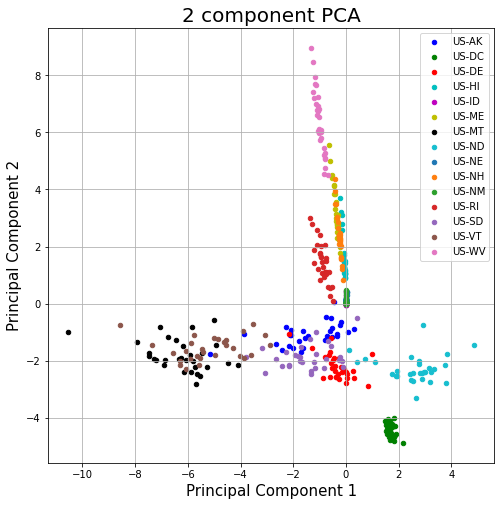

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target, color in zip(targets,colors):
    indicesToKeep = df['open_covid_region_code'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

PC1 captures direction of where most the variation is
PC2 captures the direction of where most the second variation is